<a href="https://colab.research.google.com/github/stswee/IntroCompStatsHSSP2023/blob/main/Class_Code/Intro_to_Comp_Statistics_Bootstrap_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bootstrap Primer

In this notebook, we will be performing parametric and nonparametric bootstrapping along with visualizing the results to verify that the methods proposed work. For more details, please refer to the slides under Bootstrap Primer.

### Dataset

Let's start with generating 1000 samples from a normal distribution with mean 0 and standard deviation 1.

In [16]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

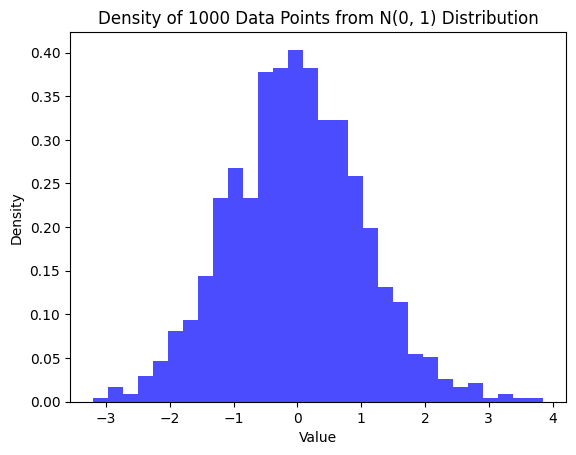

In [20]:
# Generate samples
# Set seed for reproducibility
np.random.seed(100)

# Generate 1000 data points from N(0, 1) distribution
data = np.random.normal(0, 1, 1000)

# Plot the density
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density of 1000 Data Points from N(0, 1) Distribution')
plt.show()

### Parametric Bootstrapping

Hypothetically, let's say that we know or we assume the form of the underlying distribution. In this case, we know/assume that the data comes from some normal distribution. While we do know the true mean and true standard deviation, in practice, we have to estimate these. Let's estimate them using the sample mean and sample standard deviation.

In [19]:
# Calculate sample mean and sample standard deviation
sample_mean = np.mean(data)
print("Sample mean:", sample_mean)
sample_standard_deviation = np.std(data)
print("Sample standard deviation:", sample_standard_deviation)

Sample mean: -0.016772157343909157
Sample standard deviation: 1.0458427194167


As we can see, the sample mean and sample standard deviation are really close to the true values of 0 and 1, respectively!

Since we now have all the parameters needed for our proposed normal distribution, we can simulate the data collection process. The idea is to have the two histograms, one with original data and one with simulated data, be almost the same.

In truth, we will never get the true values as this would require an infinite sample size to guarantee achieving. But, with enough data points, we can get close!

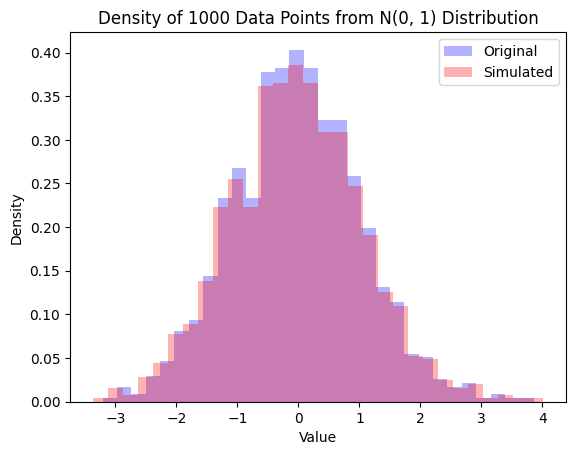

In [21]:
# Set seed for reproducibility
np.random.seed(100)

# Generate 1000 data points from estimated distribution
simulated_data = np.random.normal(sample_mean, sample_standard_deviation, 1000)

# Plot the histograms
plt.hist(data, bins=30, density=True, alpha=0.3, color='blue', label='Original')
plt.hist(simulated_data, bins=30, density=True, alpha=0.3, color='red', label='Simulated')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density of 1000 Data Points from N(0, 1) Distribution')
plt.legend()
plt.show()

Ideally, we would like as much overlap as possible between the two histograms. Visually, the purple overlap area takes up the majority of the figure, indicating that our procedure works!

Since we are now able to sample from some distribution, we can perform the exact same procedure as Monte Carlo and calculate the estimated p-value as needed (see Class Code for more details and example).

### Nonparametric Bootstrapping

Let's now look at the case where we do not know the form of the underlying distribution. We would then have to resort to nonparametric bootstrapping since we do not know how many parameters are needed to describe the underlying distribution (for all we know, it could be infinite). Since we know that our data has to come from the underlying distribution, by sampling and resampling from our data, we are effectively sampling from that same underlying distribution (at least, approximately).

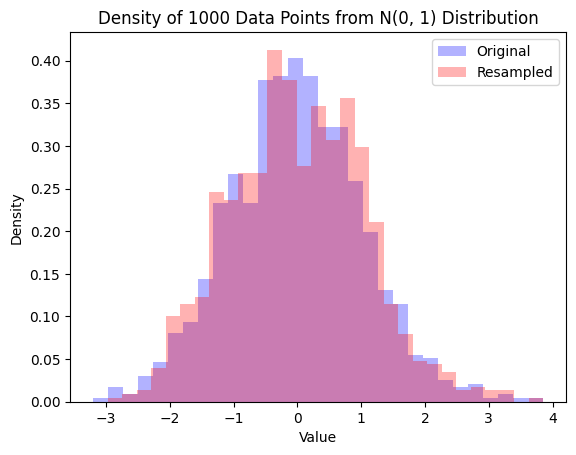

In [23]:
# Set seed for reproducibility
np.random.seed(100)

# Generate sample from our original data
resampled_data = np.random.choice(data, size = 1000, replace = True)

# Plot the histograms
plt.hist(data, bins=30, density=True, alpha=0.3, color='blue', label='Original')
plt.hist(resampled_data, bins=30, density=True, alpha=0.3, color='red', label='Resampled')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density of 1000 Data Points from N(0, 1) Distribution')
plt.legend()
plt.show()

Like before, we would like to have as much overlap in the histograms as possible. Since the purple area takes up the majority of the area, our procedure works!

### Parametric vs. Nonparametric

In general, parametric methods have the advantage of more statistical power (i.e. we are better able to detect interesting features if they do exist). This means that parametric methods are said to be more "efficient" in the sense that we don't need as large of a sample size to detect a significant effect when we use a parametric method over a nonparametric method.

However, parametric methods require us to make assumptions about the distribution underlying the data. If we were to make these assumptions, we should justify why these assumptions hold. With nonparametric methods, we don't have to make such assumptions and can tackle a wider range of problems.

Truthfully, one should not think of one method being strictly better than the other. Rather, each approach has their own use cases. By coming across more problems, you get a better understanding of when to use either approach.